In [101]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [95]:
# reading and splitting data
df = pd.read_csv("../data/NOAA_Storms.csv")
X = df[['Max_Wind', 'Min_Pressure', 'Radius_Max_Wind']]
Y = df['Storm_Status']
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=.4)

In [69]:
# Trying 10 trees
ada = AdaBoostClassifier(n_estimators=10)

# Train adaboost classifer
model = ada.fit(trainX, trainY)
print(model.score(testX, testY))

0.4098557692307692


In [71]:
## Trying 5 trees and different learning rate

ada = AdaBoostClassifier(n_estimators=5,
                                learning_rate=.2)

# Train adaboost classifer
model = ada.fit(trainX, trainY)
print(model.score(testX, testY))

0.41586538461538464


In [78]:
## Trying 15 trees and different learning rate

ada = AdaBoostClassifier(n_estimators=15,
                                learning_rate=1)

# Train adaboost classifer
model = ada.fit(trainX, trainY)
print(model.score(testX, testY))

0.6622596153846154


In [89]:
## Trying 5 trees and different learning rate

ada = AdaBoostClassifier(n_estimators=5,
                                learning_rate=1)

# Train adaboost classifer
model = ada.fit(trainX, trainY)
print(model.score(testX, testY))

0.6742788461538461


In [91]:
## Trying 55 trees and different learning rate

ada = AdaBoostClassifier(n_estimators=55,
                                learning_rate=1)

# Train adaboost classifer
model = ada.fit(trainX, trainY)
print(model.score(testX, testY))

0.6971153846153846


In [96]:
## Trying 75 trees and different learning rate

ada = AdaBoostClassifier(n_estimators=75,
                                learning_rate=1)

# Train adaboost classifer
model = ada.fit(trainX, trainY)
print(model.score(testX, testY))

0.6778846153846154


In [94]:
## Trying 105 trees and different learning rate

ada = AdaBoostClassifier(n_estimators=105,
                                learning_rate=1)

# Train adaboost classifer
model = ada.fit(trainX, trainY)
print(model.score(testX, testY))

0.6875


In [97]:
import matplotlib.pyplot as plt

Trees = list(range(1,1000))
Accuracy_list = []

for i in range(1, 1000):
    trainX, testX, trainY, testY = train_test_split(X, Y, test_size=.4)
    ada = AdaBoostClassifier(n_estimators=75,
                                learning_rate=1)
    model = ada.fit(trainX, trainY)
    accuracy = model.score(testX, testY)
    Accuracy_list.append(accuracy)

graph_df = pd.DataFrame({"Trees":Trees, "Accuracy Rate": Accuracy_list})
graph_df


KeyError: 'C'

In [104]:
# Print max accuracy score
graph_df["Accuracy Rate"].max()

0.7259615384615384

Text(0.5, 0, 'Number of trees')

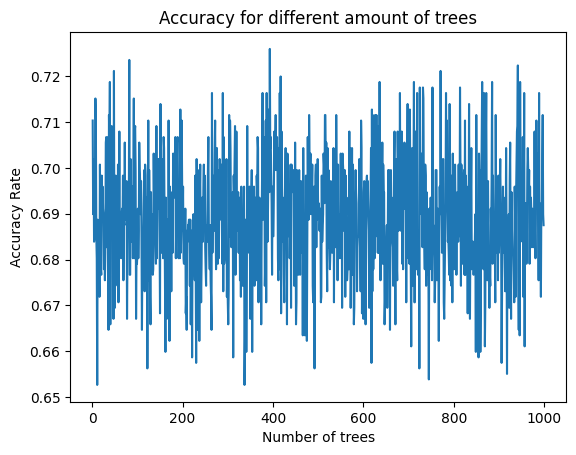

In [100]:
plt.plot(graph_df["Trees"], graph_df["Accuracy Rate"])
plt.title("Accuracy for different amount of trees")
plt.ylabel("Accuracy Rate")
plt.xlabel("Number of trees")

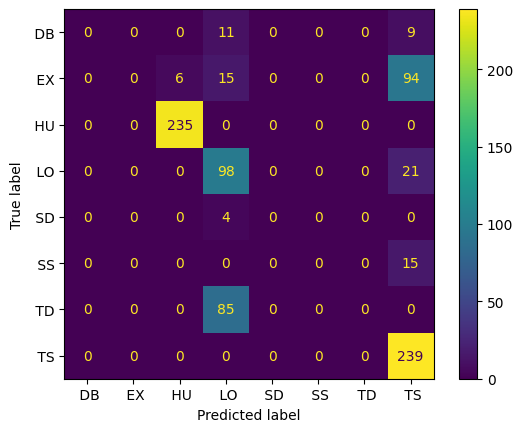

In [102]:
# confusion matrix
predictions = model.predict(testX)
cm = confusion_matrix(testY, predictions, labels=model.classes_)
cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
cm_plot.plot()